In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [33]:
df = pd.read_csv('data\\NBA_Player_Dataset-2013-2021.csv')

In [35]:
df.columns

Index(['Year', 'FULL NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'MIN%', 'USG%',
       'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG',
       'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'VI', 'ORTG', 'DRTG',
       'TO_100_Games', 'Salary', 'Cap Maximum', 'Salary%OfCap', 'Traded',
       'Center', 'Forward', 'Guard', 'Salary_BoxCox'],
      dtype='object')

In [37]:
#remove unnecessary columns from correlation matrix
corr_df = df.drop(['Salary', 'FULL NAME', 'TEAM', 'POS', 'Salary%OfCap', 'Traded', 'Cap Maximum', 'Salary'], axis = 1)

#remove and add salary so it shows up at the bottom
corr_df['Salary'] = df['Salary']

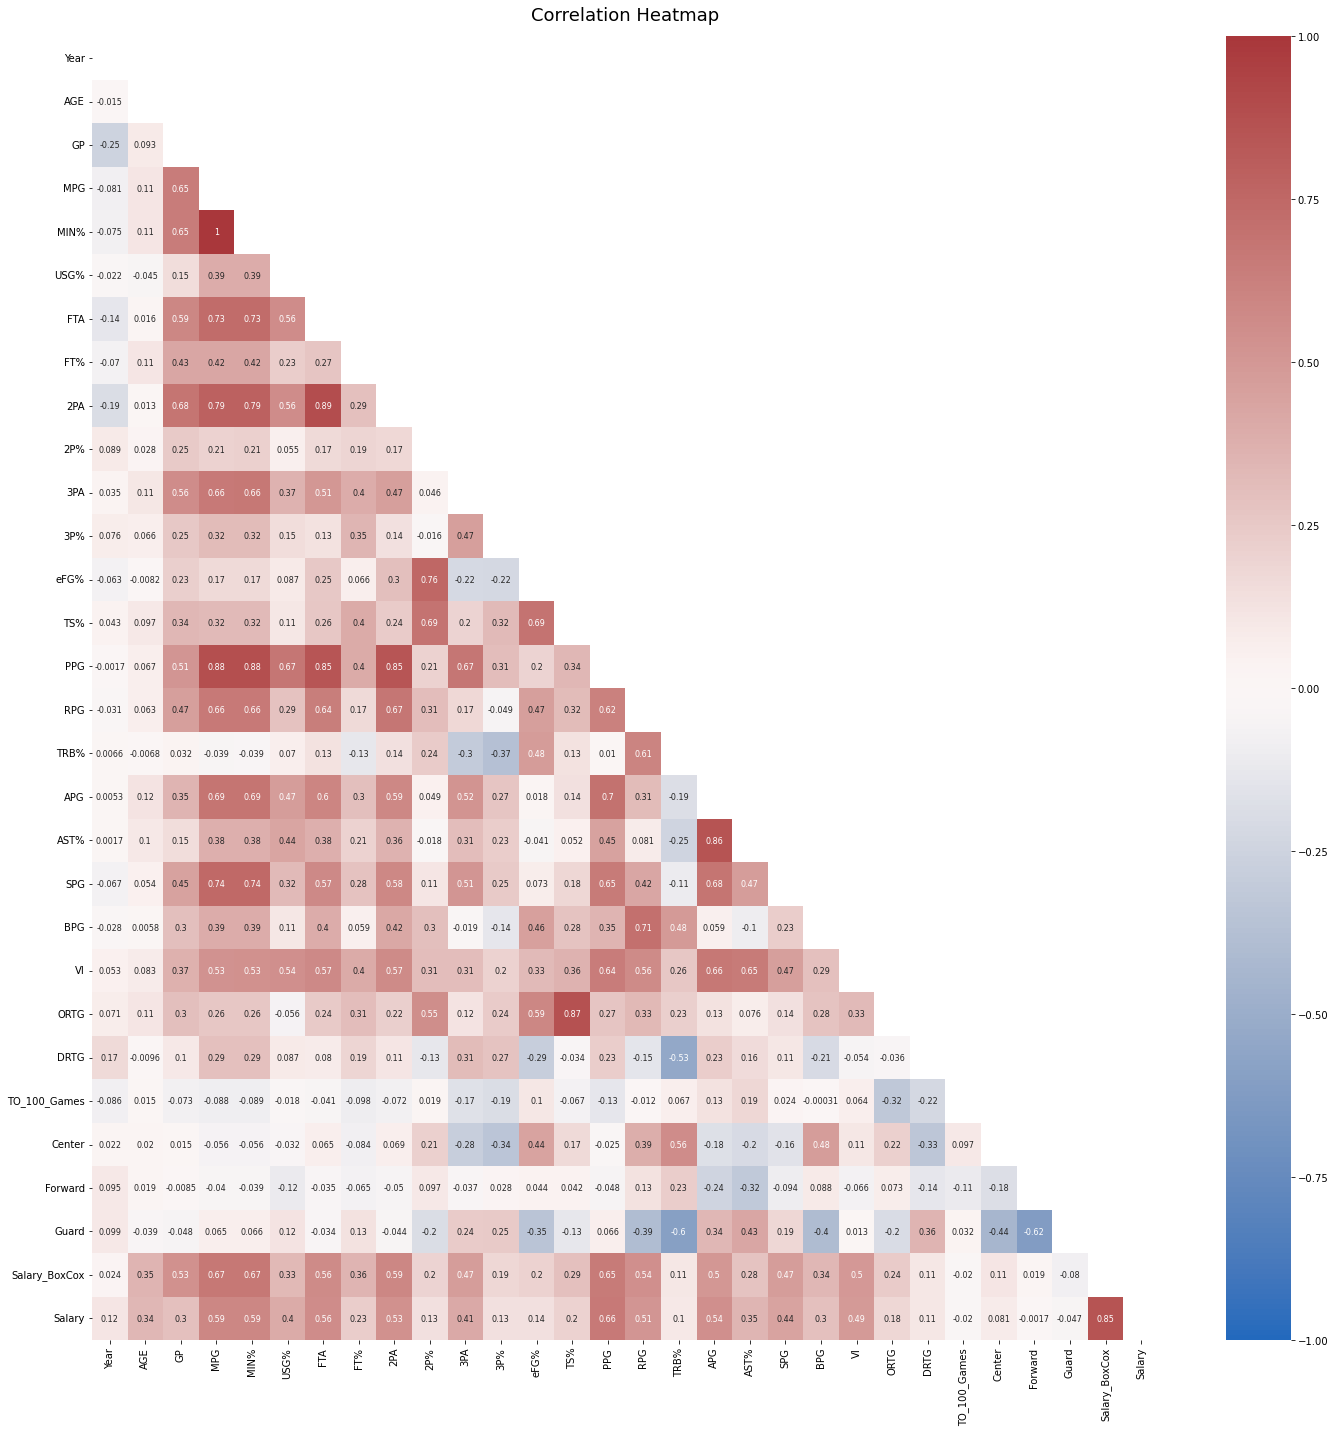

In [38]:
plt.figure(figsize=(20, 20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_df.corr(), dtype=bool))
heatmap = sns.heatmap(corr_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap = "vlag", annot_kws={"fontsize":8})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

plt.tight_layout()
plt.savefig('images/correlation_heatmap.png')
plt.show()

# Correlation Discussion

Not that many highly correlated variables!  

In [54]:
threshold = 0.8

def high_cor_function(df):
    #correlation function to pull out highest values
    cor = df.corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    print(high_cor[high_cor>thresh])



In [55]:
high_cor_function(corr_df)

max corr: nan , min corr:  nan
MPG     MIN%             0.999831
2PA     FTA              0.885925
MIN%    PPG              0.881276
MPG     PPG              0.881218
ORTG    TS%              0.870340
APG     AST%             0.856519
Salary  Salary_BoxCox    0.853266
PPG     2PA              0.845500
FTA     PPG              0.845244
dtype: float64


In [51]:
#Pull out the highest correlated features with target variable
threshold = 0.5

cor = corr_df.corr()

cor_criterion = abs(cor['Salary_BoxCox'])

relevant_features = cor_criterion[cor_criterion>threshold]
relevant_features = relevant_features.reset_index()
relevant_features.columns = ['Variables', 'Correlation']
relevant_features = relevant_features.sort_values(by='Correlation', ascending=False)
relevant_features

,Variables,Correlation
8,Salary_BoxCox,1.000000
9,Salary,0.853266
2,MIN%,0.666790
1,MPG,0.665877
5,PPG,0.651551
4,2PA,0.590660
3,FTA,0.564578
6,RPG,0.544078
0,GP,0.532398
7,APG,0.503185


# Explore Dependent Variable

Need to transform dependent variable, not normally distributed, most models make the assumption the dependent variable is normally distributed.

Box Cox works pretty good for this

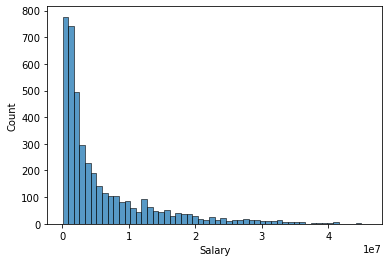

In [8]:
#histogram - salary is heavily skewed, lots of models make assumptions about the data being normally distributed.
#need to transform it.  

sns.histplot(df['Salary'])


In [17]:
df['Salary'].skew()

2.0022667119801336

In [22]:
#boxcox transform the data, save parameter value

from scipy import stats

boxcox_y = stats.boxcox(df['Salary'])[0]
parameter = stats.boxcox(df['Salary'])[1]

In [28]:
df['Salary_BoxCox'] = boxcox_y

In [16]:
#much lower skew close to 0

pd.Series(boxcox_y).skew()

-0.042094417046586854

<AxesSubplot:ylabel='Count'>

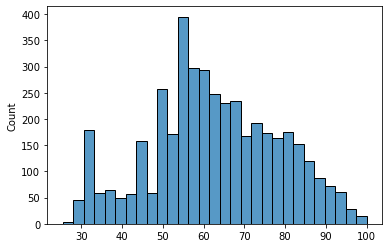

In [18]:
#histogram is "relatively" normal.  It's a lot better, should result in better predictive results

sns.histplot(boxcox_y)

In [26]:
#will need to invert the predicted values for any analysis, but it's easy.  

from scipy.special import inv_boxcox

inv_boxcox(boxcox_y, parameter)

array([ 2711280.        , 17073170.99999997, 28103500.00000001, ...,
        8600000.        ,  3857040.        ,  1633440.        ])

# Salary Changes over the years 

The violin plot shows the skewness of the data.  Was originally going to incorporate the salary cap to come up with some kind of adjusted salary based on the year, but after the box cox transformation...  Data looks okay.  Think we can just proceed.  

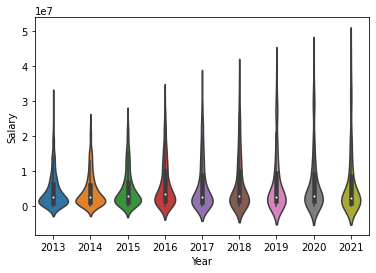

In [27]:
ax = sns.violinplot(x="Year", y="Salary", data=df)

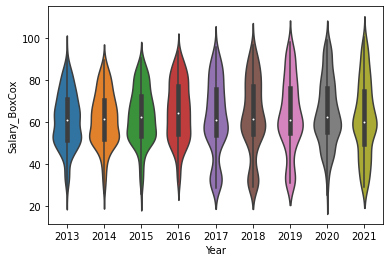

In [56]:
ax = sns.violinplot(x="Year", y="Salary_BoxCox", data=df)

# Regression Plots

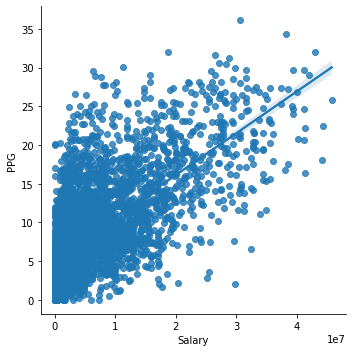

In [5]:
sns.lmplot(x='Salary',y='PPG',data=df)

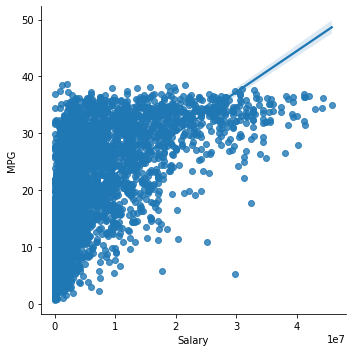

In [6]:
sns.lmplot(x='Salary',y='MPG',data=df)

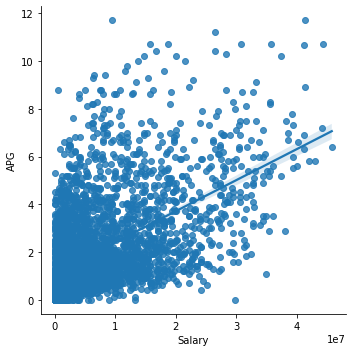

In [7]:
sns.lmplot(x='Salary',y='APG',data=df)